In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as sk 

from matplotlib import style  
style.use('dark_background')

In [2]:
bostonHousePrice = pd.read_csv('housing.data.csv', sep="\s+")
bostonHousePrice.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
bostonHousePrice.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [4]:
bostonHousePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


If you recall from the last lab, we found that possibly the ‘RM’ (number of rooms) and ‘LSTAT’ (unsure) variables seem to have a 

linear relationship with the house price (‘MEDV’). Hence, we will try these variables as the independent variable to predict the 

house price, i.e., the dependent variable. Create an independent variable that is just based on the ‘RM’ column and a dependent 

variable of ‘MEDV’. Assign the values of the 'RM' column to a variable named 'uniRmX' and assign the values of the 'MEDV' column to 

a variable named 'Y'.

In [5]:
uniRmX = bostonHousePrice['RM']
Y = bostonHousePrice['MEDV']

* Next, we want to create some data to train the model, and some other data to evaluate how good the model is. We may be tempted to 

use 100% of the data for training, then select a subset for evaluation (say 20% of the data). However, we will find out later that 

this isn’t a good idea generally, as the data we use to test is the same we use to train, and likely to cause overfitting and what 

is called bias. We will discuss this more in a later week, but for now, just note that it isn’t a good idea to do so. 



* Instead, we will split the data into a training set, which we use to fit the model/hypothesis, and a testing set, which we will use 

to evaluate the performance of the fitted model/hypothesis. There should be no overlap between the two sets. How we achieve this is 

typically randomly split the data, say 80% for training and 20% for testing. We can do this ourselves, but like many machine 

learning functionality these days, they are already implemented, and of course, they are available in the libraries we have 

imported.

In [6]:
# create testing and training data for RM variable
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(np.array(uniRmX), np.array(Y), test_size=0.2)
trainX = trainX.reshape(-1,1)
testX = testX.reshape(-1,1)
testY = testY.reshape(-1,1)
trainY = trainY.reshape(-1,1)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [7]:
from sklearn import linear_model
linReg = linear_model.LinearRegression()

In [8]:
linReg

LinearRegression()

In [9]:
linReg.fit(trainX, trainY)

LinearRegression()

In [10]:
print('Intercept:', linReg.intercept_)
print('Coefficient/Theta', linReg.coef_)

Intercept: [-34.68451701]
Coefficient/Theta [[9.09771816]]


In [11]:
predYRm = linReg.predict(testX)

In [12]:
from sklearn.metrics import mean_squared_error
print('Mean squared error ', mean_squared_error(testY, predYRm))

Mean squared error  41.024985151376704


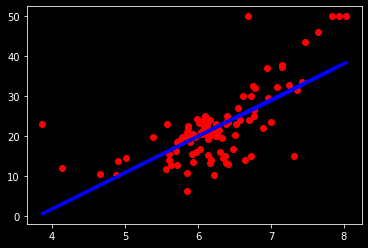

In [13]:
plt.scatter(testX, testY, color='red')
plt.plot(testX, predYRm, color='blue', linewidth=3)

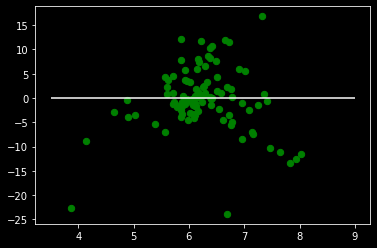

In [14]:
plt.scatter(testX, linReg.predict(testX) - testY, c='g', s=40)
plt.hlines(y=0, xmin=3.5, xmax=9)

**Multivariate Regression**

In [23]:
X = bostonHousePrice.drop('MEDV', axis=1)
Y = bostonHousePrice[['MEDV']]

In [24]:
trainX, testX, trainY, testY = train_test_split(np.array(X), np.array(Y), test_size=0.05)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(480, 13)
(26, 13)
(480, 1)
(26, 1)


In [25]:
linRegMulti = linear_model.LinearRegression()

In [26]:
linRegMulti

LinearRegression()

In [27]:
linRegMulti.fit(trainX, trainY)

LinearRegression()

In [28]:
print('Intercept:', linReg.intercept_)
print('Coefficient/Theta', linReg.coef_)

Intercept: [-34.68451701]
Coefficient/Theta [[9.09771816]]


In [29]:
prediction = linRegMulti.predict(testX)
print('Mean squared error ', mean_squared_error(testY, prediction))

Mean squared error  8.689240553997674
